# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Linear-Regression-problem" data-toc-modified-id="Linear-Regression-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression problem</a></div><div class="lev1 toc-item"><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gradient Descent</a></div><div class="lev1 toc-item"><a href="#Gradient-Descent---Classification" data-toc-modified-id="Gradient-Descent---Classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gradient Descent - Classification</a></div><div class="lev1 toc-item"><a href="#Gradient-descent-with-numpy" data-toc-modified-id="Gradient-descent-with-numpy-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gradient descent with numpy</a></div>

In [2]:
%matplotlib inline
from fastai.learner import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [3]:
# Here we generate some fake data
def lin(a,b,x): return a*x+b

def gen_fake_data(n, a, b):
    x = s = np.random.uniform(0,1,n) 
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x, y

x, y = gen_fake_data(50, 3., 8.)

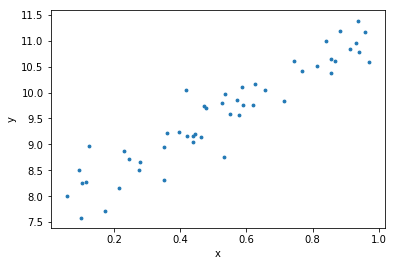

In [4]:
plt.scatter(x,y, s=8); plt.xlabel("x"); plt.ylabel("y"); 

In [6]:
df = pd.DataFrame.from_dict({'x': x, 'y': y})

In [11]:
df['sstot'] = np.square(df.y - df.y.mean())

In [12]:
df['ssres'] = np.square(df.y - df.x)

In [15]:
df['rsq'] = 1 - (df.ssres / df.sstot)

In [16]:
df.rsq

0    -5.694418e+02
1    -2.844013e+03
2    -3.856970e+01
3    -3.607065e+01
4    -2.963617e+01
5    -1.796300e+03
6    -3.271170e+01
7    -1.105981e+02
8    -3.722200e+01
9    -6.457465e+02
10   -1.366149e+02
11   -5.992018e+01
12   -9.247275e+01
13   -6.181344e+02
14   -4.250684e+02
15   -2.999410e+03
16   -9.652133e+01
17   -2.403074e+01
18   -4.104856e+01
19   -1.198096e+03
20   -4.003977e+02
21   -3.247565e+02
22   -9.517867e+01
23   -1.298796e+03
24   -3.825534e+07
25   -1.535050e+01
26   -1.424097e+02
27   -9.198196e+01
28   -1.452618e+02
29   -5.316519e+01
30   -2.054637e+02
31   -1.300812e+01
32   -8.935405e+01
33   -2.789560e+02
34   -8.098818e+01
35   -2.591001e+02
36   -5.159938e+02
37   -6.120404e+01
38   -8.567928e+01
39   -6.793650e+01
40   -3.790862e+02
41   -1.180695e+05
42   -6.412744e+03
43   -5.751465e+01
44   -4.110758e+02
45   -4.244367e+02
46   -3.450776e+03
47   -5.153856e+01
48   -1.805209e+02
49   -4.083783e+01
Name: rsq, dtype: float64

You want to find **parameters** (weights) $a$ and $b$ such that you minimize the *error* between the points and the line $a\cdot x + b$. Note that here $a$ and $b$ are unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [8]:
def mse(y_hat, y): return ((y_hat - y) ** 2).mean()

Suppose we believe $a = 10$ and $b = 5$ then we can compute `y_hat` which is our *prediction* and then compute our error.

In [10]:
y_hat = lin(10,5,x)
mse(y_hat, y)

3.6766268987924544

In [11]:
def mse_loss(a, b, x, y): return mse(lin(a,b,x), y)

In [12]:
mse_loss(10, 5, x, y)

3.6766268987924544

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for $a$ and $b$? How do we find the best *fitting* linear regression.

# Gradient Descent

For a fixed dataset $x$ and $y$ `mse_loss(a,b)` is a function of $a$ and $b$. We would like to find the values of $a$ and $b$ that minimize that function.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [13]:
# generate some more data
x, y = gen_fake_data(10000, 3., 8.)
x.shape, y.shape

((10000,), (10000,))

In [14]:
x,y = V(x),V(y)

In [15]:
# Create random weights a and b, and wrap them in Variables.
a = V(np.random.randn(1), requires_grad=True)
b = V(np.random.randn(1), requires_grad=True)
a,b

(Variable containing:
 -0.5342
 [torch.FloatTensor of size 1], Variable containing:
 -0.3449
 [torch.FloatTensor of size 1])

In [16]:
learning_rate = 1e-3
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    loss = mse_loss(a,b,x,y)
    if t % 1000 == 0: print(loss.data[0])
    
    # Computes the gradient of loss with respect to all Variables with requires_grad=True.
    # After this call a.grad and b.grad will be Variables holding the gradient
    # of the loss with respect to a and b respectively
    loss.backward()
    
    # Update a and b using gradient descent; a.data and b.data are Tensors,
    # a.grad and b.grad are Variables and a.grad.data and b.grad.data are Tensors
    a.data -= learning_rate * a.grad.data
    b.data -= learning_rate * b.grad.data
    
    # Zero the gradients
    a.grad.data.zero_()
    b.grad.data.zero_()    

103.2415771484375
0.7690687775611877
0.12176155298948288
0.11154710501432419
0.1067400649189949
0.10306715220212936
0.10024633258581161
0.09807989746332169
0.0964159220457077
0.09513799101114273


Nearly all of deep learning is powered by one very important algorithm: **stochastic gradient descent (SGD)**. SGD can be seeing as an approximation of **gradient descent** (GD). In GD you have to run through *all* the samples in your training set to do a single itaration. In SGD you use *only one* or *a subset*  of training samples to do the update for a parameter in a particular iteration. The subset use in every iteration is called a **batch** or **minibatch**.

# Gradient Descent - Classification

For a fixed dataset $x$ and $y$ `mse_loss(a,b)` is a function of $a$ and $b$. We would like to find the values of $a$ and $b$ that minimize that function.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [17]:
def gen_fake_data2(n, a, b):
    x = s = np.random.uniform(0,1,n) 
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x, np.where(y>10, 1, 0).astype(np.float32)

In [18]:
x,y = gen_fake_data2(10000, 3., 8.)
x,y = V(x),V(y)

In [19]:
def nll(y_hat, y):
    y_hat = torch.clamp(y_hat, 1e-5, 1-1e-5)
    return (y*y_hat.log() + (1-y)*(1-y_hat).log()).mean()

In [20]:
a = V(np.random.randn(1), requires_grad=True)
b = V(np.random.randn(1), requires_grad=True)

In [21]:
learning_rate = 1e-2
for t in range(3000):
    p = (-lin(a,b,x)).exp()
    y_hat = 1/(1+p)
    loss = nll(y_hat,y)
    if t % 1000 == 0:
        print(loss.data[0], np.mean(to_np(y)==(to_np(y_hat)>0.5)))
#         print(y_hat)
    
    loss.backward()
    a.data -= learning_rate * a.grad.data
    b.data -= learning_rate * b.grad.data
    a.grad.data.zero_()
    b.grad.data.zero_()    

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

Nearly all of deep learning is powered by one very important algorithm: **stochastic gradient descent (SGD)**. SGD can be seeing as an approximation of **gradient descent** (GD). In GD you have to run through *all* the samples in your training set to do a single itaration. In SGD you use *only one* or *a subset*  of training samples to do the update for a parameter in a particular iteration. The subset use in every iteration is called a **batch** or **minibatch**.

# Gradient descent with numpy

In [22]:
from matplotlib import rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3

In [23]:
x, y = gen_fake_data(50, 3., 8.)

In [24]:
a_guess,b_guess = -1., 1.
mse_loss(a_guess, b_guess, x, y)

65.148274608071048

In [25]:
lr=0.01
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [26]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(30): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 20), interval=100)
ani